## Data Project - Stock Market Analysis 

In this portfolio project we will be looking at data from the stock market, particularly some technology stocks. We will learn how to use pandas to get stock information, visualize different aspects of it, and finally we will look at a few ways of analyzing the risk of a stock, based on its previous performance history. We will also be predicting future stock prices through a Monte Carlo method!

We'll be answering the following questions along the way:

    1.) What was the change in price of the stock over time?
    2.) What was the daily return of the stock on average?
    3.) What was the moving average of the various stocks?
    4.) What was the correlation between different stocks' closing prices?
    4.) What was the correlation between different stocks' daily returns?
    5.) How much value do we put at risk by investing in a particular stock?
    6.) How can we attempt to predict future stock behavior?

#### Basic Analysis of Stock Information

In this section we'll go over how to handle requesting stock information with pandas, and how to analyze basic attributes of a stock.


In [1]:
# Standard Imports
from __future__ import division
import pandas as pd 
from pandas import Series,DataFrame
import numpy as np

# For Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline



# For reading stock data from yahoo
from pandas_datareader import data,io

# For time stamps
from datetime import datetime




Let's use Yahoo and pandas to grab some data for some tech stocks.

In [2]:
# The tech stocks we'll use for this analysis
tech_list = ['AAPL','GOOG','MSFT','AMZN']

## Set up End and Start times for data grab
end = datetime.now()
start = datetime(end.year-1,end.month,end.day)

#For loop for grabing yahoo finance data and setting as a dataframe
for stock in tech_list:
    globals()[stock] = data.DataReader(stock,'yahoo',start,end)

Let's go ahead and play aorund with the AAPL DataFrame to get a feel for the data

In [3]:
# Summary Stats
AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close
count,253.000000,253.000000,253.000000,253.000000,2.530000e+02,253.000000
mean,120.688824,117.614486,119.271571,119.154792,1.252785e+08,118.756437
std,13.423202,13.233620,13.432680,13.316194,5.392154e+07,13.433161
min,86.419998,83.144997,83.312500,83.974998,4.669130e+07,83.412964
25%,115.849998,112.500000,114.352501,114.089996,8.853050e+07,113.530724
50%,123.519997,120.260002,121.750000,121.779999,1.118507e+08,121.392097
75%,129.720001,126.760002,128.500000,127.900002,1.519481e+08,127.683121
max,145.089996,141.369995,143.600006,143.160004,3.743368e+08,142.704010


In [4]:
# General Info
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2020-06-10 to 2021-06-10
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       253 non-null    float64
 1   Low        253 non-null    float64
 2   Open       253 non-null    float64
 3   Close      253 non-null    float64
 4   Volume     253 non-null    float64
 5   Adj Close  253 non-null    float64
dtypes: float64(6)
memory usage: 13.8 KB


Now that we've seen the DataFrame, let's go ahead and plot out the volume and closing price of the stocks

<AxesSubplot:xlabel='Date'>

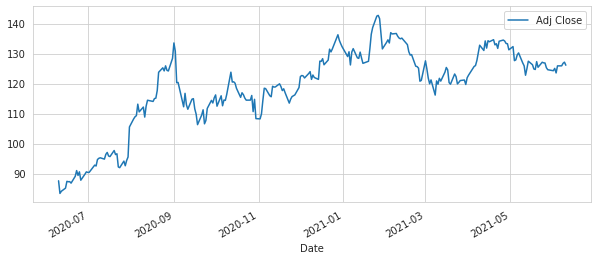

In [5]:
# Let's see a historical view of the closing price
AAPL['Adj Close'].plot(legend=True,figsize=(10,4))

<AxesSubplot:xlabel='Date'>

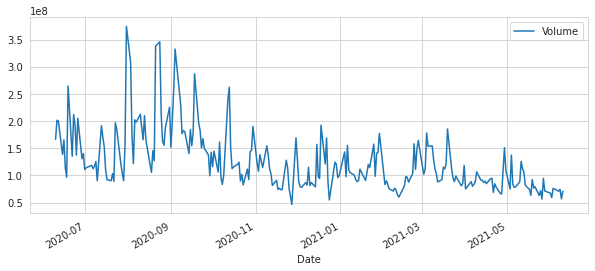

In [6]:
# Now let's plot the total volume of stock being traded each day over the past 5 years
AAPL['Volume'].plot(legend=True,figsize=(10,4))

Now that we've seen the visualizations for the closing price and the volume traded each day, let's go ahead and caculate the moving average for the stock.

In [7]:
# Luckily pandas has a built-in rolling mean calculator

# Let's go ahead and plot out several moving averages

ma_day = [10,20,50]

for ma in ma_day:
    column_name = "MA for %s days"%(str(ma))
    AAPL[column_name] = pd.Series(AAPL['Adj Close']).rolling(ma).mean()



Now let's go ahead and plot all the additional Moving Averages

<AxesSubplot:xlabel='Date'>

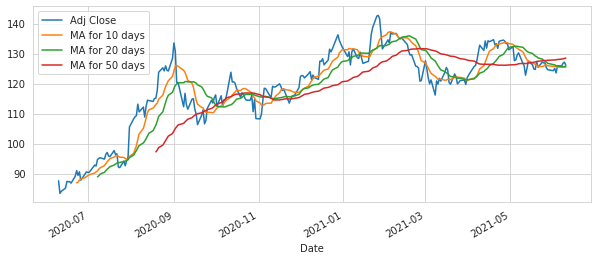

In [8]:
AAPL[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots = False,figsize=(10,4))

#### Section 2 - Daily Return Analysis

Now that we've done some baseline analysis, let's go ahead and dive a little deeper. We're now going to analyze the risk of the stock. In order to do so we'll need to take a closer look at the daily changes of the stock, and not just its absolute value. Let's go ahead and use pandas to retrieve teh daily returns for the Apple stock.

<AxesSubplot:xlabel='Date'>

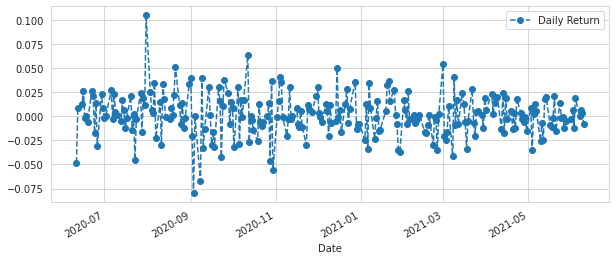

In [9]:
# We'll use pct_change to find the percent change for each day
AAPL['Daily Return']= AAPL['Adj Close'].pct_change()

# Then we'll plot the daily return percentage
AAPL['Daily Return'].plot(figsize=(10,4),legend =True,linestyle = '--',marker='o')

now let's get an overall look at the average daily return using a histogram. We'll use seaborn to create both a histogram and kde plot on the same figure.

/home/chetan/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Daily Return', ylabel='Density'>

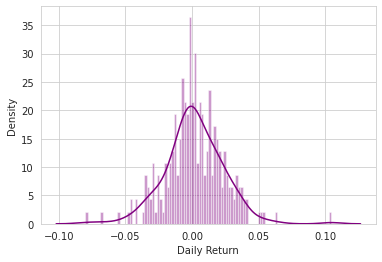

In [10]:
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color = 'purple')

<AxesSubplot:>

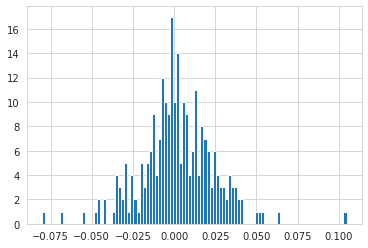

In [11]:
# Could have also done:
AAPL['Daily Return'].hist(bins=100)

Now what if we wanted to analyze the returns of all the stocks in our list? Let's go ahead and build a DataFrame with all the ['Close'] columns for each of the stocks dataframes.

In [12]:
# Grab all the closing prices for the tech stock list into one DataFrame
import pandas_datareader as pdr
closing_df = pdr.DataReader(tech_list,'yahoo',start,end)['Adj Close']

In [13]:
# Let's take a quick look
closing_df.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2020-06-10,87.619614,1465.849976,194.952362,2647.449951
2020-06-11,83.412964,1403.839966,184.483734,2557.959961
2020-06-12,84.133095,1413.180054,185.939621,2545.020020
2020-06-15,85.173584,1419.849976,187.128113,2572.679932
2020-06-16,87.430885,1442.719971,191.713745,2615.270020


Now that we have all the closing prices, let's go ahead and get the daily return for all the stocks, like we did for the Apple stock.

In [14]:
# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()

In [15]:
# Let's take a quick look
tech_rets.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2020-06-10,NaN,NaN,NaN,NaN
2020-06-11,-0.048010,-0.042303,-0.053698,-0.033802
2020-06-12,0.008633,0.006653,0.007892,-0.005059
2020-06-15,0.012367,0.004720,0.006392,0.010868
2020-06-16,0.026502,0.016107,0.024505,0.016555


Now we can compare the daily percentage return of two stocks to check how correlated. First let's see a sotck compared to itself.

/home/chetan/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


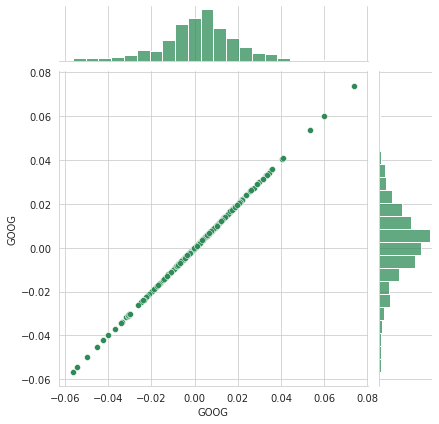

In [16]:
# Comparing Google to itself should show a perfectly linear relationship
sns.jointplot('GOOG','GOOG',tech_rets,kind = 'scatter',color = 'seagreen')

So now we can see that if two stocks are perfectly (and positivley) correlated with each other a linear relationship bewteen its daily return values should occur. So let's go ahead and compare Google and Microsoft the same way.

/home/chetan/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


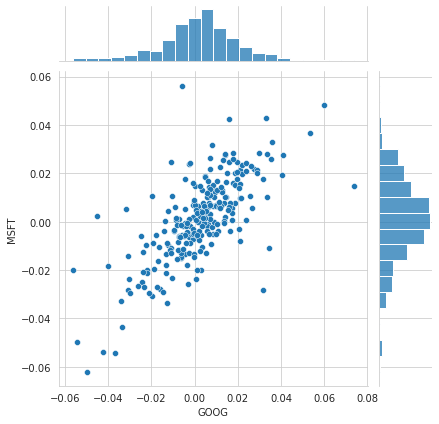

In [17]:
# We'll use joinplot to compare the daily returns of Google and Microsoft
sns.jointplot('GOOG','MSFT',tech_rets,kind='scatter')

In [18]:
tech_rets.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2020-06-10,NaN,NaN,NaN,NaN
2020-06-11,-0.048010,-0.042303,-0.053698,-0.033802
2020-06-12,0.008633,0.006653,0.007892,-0.005059
2020-06-15,0.012367,0.004720,0.006392,0.010868
2020-06-16,0.026502,0.016107,0.024505,0.016555


Seaborn and pandas make it very easy to repeat this comparison analysis for every possible combination of stocks in our technology stock ticker list. We can use sns.pairplot() to automatically create this plot

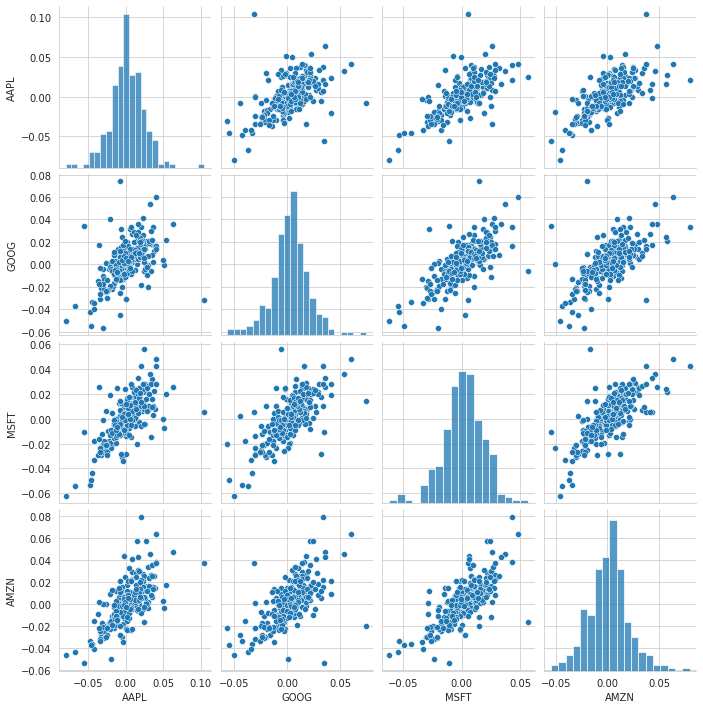

In [19]:
# We can simply call pairplot on our DataFrame for an automatic visual analysis of all the comparisons
sns.pairplot(tech_rets.dropna())

Above we can see all the relationships on daily returns between all the stocks. A quick glance shows an interesting correlation between Google and Amazon daily returns. It might be interesting to investigate that individual comaprison. While the simplicity of just calling sns.pairplot() is fantastic we can also use sns.PairGrid() for full control of the figure, including what kind of plots go in the diagonal, the upper triangle, and the lower triangle. Below is an example of utilizing the full power of seaborn to achieve this result.

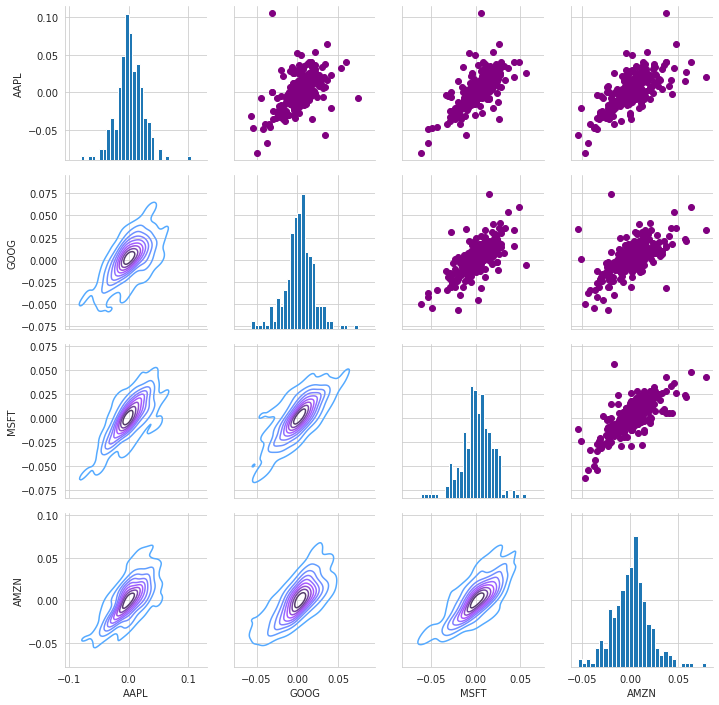

In [20]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(tech_rets.dropna())

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

We could have also analyzed the correlation of the closing prices using this exact same technique. Here it is shown, the code repeated from above with the exception of the DataFrame called.

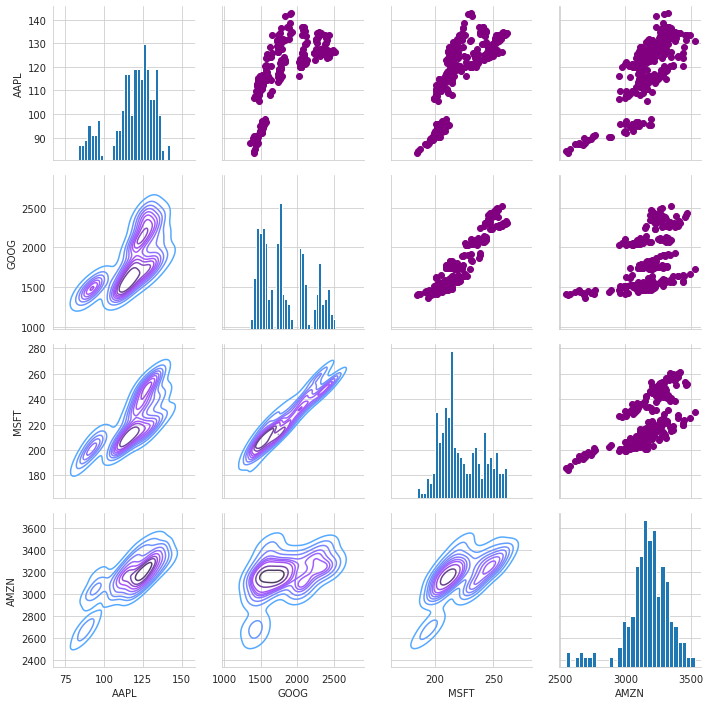

In [21]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(closing_df)

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the closing price
returns_fig.map_diag(plt.hist,bins=30)

We could have also analyzed the correlation of the closing prices using this exact same technique. Here it is shown, the code repeated from above with the exception of the DataFrame called.

<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

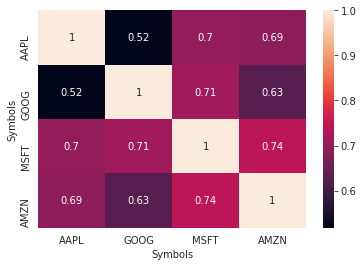

In [22]:
# Let's go ahead and use sebron for a quick correlation plot for the daily returns

sns.heatmap(data=tech_rets.corr(),annot=True)

<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

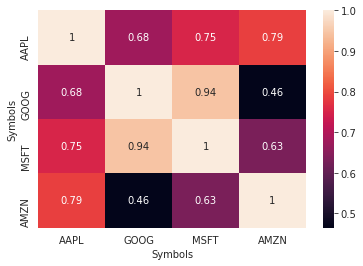

In [23]:
sns.heatmap(data=closing_df.corr(),annot=True)

Just like we suspected in our PairPlot we see here numerically and visually that Amazon and Google had the strongest correlation of daily stock return. It's also interesting to see that all the technology comapnies are positively correlated.

Great! Now that we've done some daily return analysis, let's go ahead and start looking deeper into actual risk analysis.


#### Risk Analysis

There are many ways we can quantify risk, one of the most basic ways using the information we've gathered on daily percentage returns is by comparing the expected return with the standard deviation of the daily returns.


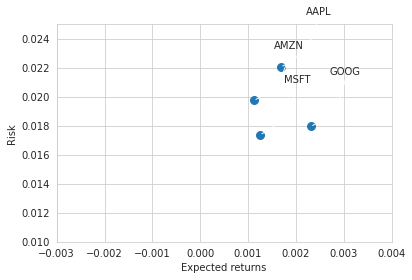

In [24]:
# Let's start by defining a new DataFrame as a clenaed version of the oriignal tech_rets DataFrame
from matplotlib import pyplot as plt

rets = tech_rets.dropna()

area = np.pi*20

plt.scatter(rets.mean(),rets.std(),s=area)

# Set the x and y limits of the plot (optional, remove this if you don't see anything in your plot)
plt.ylim([0.01,0.025])
plt.xlim([-0.003,0.004])

#Set the plot axis titles
plt.xlabel('Expected returns')
plt.ylabel('Risk')


# Label the scatter plots, for more info on how this is done, chekc out the link below
# http://matplotlib.org/users/annotations_guide.html


for label,x,y in zip(rets.columns,rets.mean(),rets.std()):
    plt.annotate(
        label,
        xy=(x,y),xytext=(50,50),
        textcoords = 'offset points',ha='right',va='bottom',
        arrowprops = dict(arrowstyle = '-',connectionstyle='arc3,rad=-0.3'))

#### Value at Risk

Let's go ahead and define a value at risk parameter for our stocks. We can treat value at risk as the amount of money we could expect to lose (aka putting at risk) for a given confidence interval. Theres several methods we can use for estimating a value at risk. Let's go ahead and see some of them in action.

#### Value at risk using the "bootstrap" method

For this method we will calculate the empirical quantiles from a histogram of daily returns.

/home/chetan/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Daily Return', ylabel='Density'>

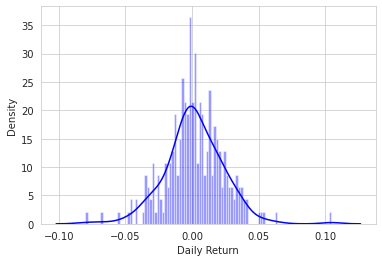

In [25]:
# Note the use of dropna() here, otherwise the NaN values can't be read by seaborn
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color = 'blue')

Now we can use quantile to get the risk value for the stock.

In [26]:
# The 0.05 empirical quantile of daily returns
rets['AAPL'].quantile(0.05)

-0.033771152996743756

The 0.05 empirical quantile of daily returns is at -0.019. That means that with 95% confidence, our worst daily loss will not exceed 1.9%. If we have a 1 million dollar investment, our one-day 5% VaR is 0.019 * 1,000,000 = $19,000.

Go ahead and repeat this for the other stocks in out portfolio, then afterwards we'll look at value at risk by implementing a Monte Carlo method.

#### Value at Risk using the Monte Carlo method

To demonstrate a basic Monte Carlo method, we will start with just a few simulations. First we'll define the variables we'll be using the Google DataFrame GOOG


In [27]:
# Set up our time horizon
days = 365

# Now our delta
dt = 1/days

# Now let's grab our mu (drift) from the expected return data we got for AAPL
mu = rets.mean()['GOOG']

# Now let's grab the volatility of the stock from the std() of the average return
sigma = rets.std()['GOOG']

In [29]:
def stock_monte_carlo(start_price,days,mu,sigma):
     ''' This function takes in starting stock price, days of simulation,mu,sigma, and returns simulated price array'''
    
    # Define a price array
    price =np.zeros(days)
    price[0]=start_price
    
    # Schok and Drift
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    # Run price array for number of days
    for x in range(1,days):
        
        shock[x]= np.random.normal(loc = mu*dt,scale = sigma*np.sqrt(dt))
        
        drift[x]= mu * dt
        
        price[x]=price[x-1]+(price[x-1]*(drift[x]+shock[x]))
        
    return price
                            
                       

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 5)

Grate now let's put our function to work!

In [ ]:
# Get start price from GOOG.head()

start_price = 540.74

for run in range(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))
    
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte carlo analysis for Googel')

Let's go ahead and get a histogram of the end results for a much larger run. (note: This could take a little while to run , depending on the number of runs chosen)

In [ ]:
# Set a large numebr of runs
runs = 10000

# Create an empty matrix to hold the end price data
simulation = np.zeros(runs)

for run in range(runs):
        # Set the simulation data point as the last stock price for that run
    simulation[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1]

Now that we have our array of simulations, we can go ahead and plot a histogram ,as well as use qunatile to define our risk for this stock.

In [ ]:
# Now we'lll define q as the 1% empirical qunatile, this basically means that 99% of the values should fall between here
q = np.percentile(simulation,1)

plt.hist(simulation,bins=200)

#Starting Price
plt.figtext(0.6,0.8, s= "Start price :$%.2f" %start_price)

#mean ending price
plt.figtext(0.6,0.7,"Mean final price :$%2f" %simulation.mean())

#variance of the price (witin 99% confidence interval)
plt.figtext(0.6,0.6,"Var(0.99):$%2f" %(start_price - q))

#displaying 1% quantile
plt.figtext(0.15,0.6,"q(0.99):$%2f"%q)

#plot a line at the 1% quantile result
plt.axvline(x=q,linewidth=4,color='r')

#title
plt.title(u"Final price didtribution for Google stock after %s days" %days,weight='bold');

Awesome! Now we have looked at the 1% empirical quantile of the final price distribution to estimate the Value at Risk for the Google stock, which looks to be $18.38 for every investment of 569.85 (the price of one inital google stock).

This basically menas for every initial stock you purchase your putting about $18.38 at risk 99% of the time from our Monte Carlo Simulation.
